# Differensiallikninger og kontinuerlige modeller

```{admonition} Læringsutbytte
Etter å ha arbeidet med dette temaet, skal du kunne:
1. Forklare hva som menes med differensiallikninger, og hvordan slike likninger kan brukes til å modellere ulike systemer.
2. Forklare og implementere Eulers metode (Forward Euler).
3. Løse ordinære differensiallikninger med egne Python-funksjoner og funksjoner fra Scipy-biblioteket.
```

## Differensiallikninger og Eulers metode
La oss si at vi har et uttrykk for endringen i et system, for eksempler endring i konsentrasjon (fartslover/ratelover) eller endring i posisjon og hastighet (Newtons 2. lov). Disse uttrykkene beskriver den momentane endringen, det vil si den deriverte, som funksjon av tid. De er derfor _differensiallikninger_.

Eksempler på differensiallikninger er:

$$f'(x) - x = 2$$

$$y' = y$$

$$y' = x - y$$

$$u' = t + 1$$

$$u'(t) = u(t)$$

Alle disse er differensiallikner som er skrevet med litt ulike notasjoner. Felles for dem er at de inneholder den deriverte som funksjon av en eller annen variabel. Det kan være nyttig å kalle venstresida av likningen, altså den deriverte, for $u'(t)$ eller $y'$. På høyresida kan det være ulike variabler og konstanter, men det vanligste er at vi har en variabel og den integrerte funksjonen, $u(t)$ eller $y$. Vi kan derfor skrive høyresida som en funksjon av $t$ og $y$ eller $t$ og $u(t)$. To vanlige måter å skrive generelle differensiallikninger på, er derfor:

$$y' = f(t,y)$$

$$u'(t) = f(t,u(t))$$

```{admonition} Underveisoppgave
:class: tip
Studer differensiallikningene og de generelle uttrykkene og prøv å forstå sammenhengen mellom dem.
```

Et praktisk eksempel på en differensiallikning er Newtons 2. lov. Dersom summen av kreftene på ei kule som faller er $\sum F = G - L$, får vi:

$\sum F = ma(t)$

$a(t) = \frac{\sum F}{m}$

$a(t) = \frac{G}{m} - \frac{L}{m}$

$a(t) = \frac{mg}{m} - \frac{kv(t)}{m}$

$v'(t) = g - \frac{kv(t)}{m}$

Her ser vi at den siste likningen inneholder den deriverte av farten (altså akselerasjonen). Altså er dette en differensiallikning.

```{admonition} Differensiallikninger
En differensiallikning er en likning som inneholder den deriverte av en funksjon. I de fleste praktiske situasjoner beskriver slike likninger sammenhengen mellom endringen, $f'(t)$, og tilstanden, $f(t)$, til et system ved tida $t$.
```
Det vil altså si at en difflikning er en sammenheng mellom den deriverte til en funksjon, altså endringen i funksjonen, og funksjonen selv. Når vi løser en difflikning, får vi ikke et uttrykk for $x$, som når vi løser likninger – vi får et uttrykk for $f(x)$. Et enkelt eksempel på dette er:

$f'(x) = 1$

Hva slags funksjon kan være løsningen på en slik likning? Vi veit at å integrere er det motsatte av å derivere. Derfor kan vi jo integrere på begge sider av likningen for å finne $f(x)$:


$$\int f'(x) dx = \int 1\ dx$$

$$f(x) = x + C$$

Siden den deriverte av _x_ er 1, må integralet av 1 være _x_. Men den deriverte av for eksempel $x + 2$ eller $x + 10$ er jo også _1_, så derfor må vi legge til en vilkårlig konstant _C_ som viser at det er flere, ja faktisk uendelig, funksjoner som blir 1 når vi deriverer dem. Dette er fordi integralene er _ubestemte_, det vil si at vi ikke integrerer fra og til en verdi, slik som vi har gjort tidligere.

Med andre ord har vi ofte svært mange eller uendelig mange løsninger av en difflikning. Men i praksis er ofte konstanten bestemt av noen rammebetingelser som vi skal se på, og da får vi ofte én løsning. Denne rammebetingelsen består av en startverdi for $f(x)$, det vil si $f(x_0)$ eller $y_0$, som igjen bestemmer hvilken konstant vi får når vi integrerer. Dersom vi har disse initialbetingelsene, kan vi finne neste funksjonsverdi ved å løse en differensiallikning. La oss se på en enkel metode å gjøre dette på.

## Eulers metode
Vi har altså en startverdi $f(x_0)$ og ønsker å finne $f(x_0 + dx)$, altså neste funksjonsverdi. I tillegg har vi et uttrykk for den deriverte av funksjonen, nemlig differensiallikningen. Du kjenner faktisk allerede til et uttrykk som inneholder en funksjon og dens deriverte, nemlig definisjonen av den deriverte. La oss bruke den til å utlede en metode for å finne $f(x + dx)$. Vi bruker den numeriske definisjonen der vi tilnærmer grenseverdiene med en _dx_ ($\Delta x$) som er så liten som mulig:

$$f'(x) \approx \frac{f(x+dx) - f(x)}{dx}$$

Til å begynne med kjenner vi $f(x)$, altså $f(x_0)$. Dette er initialbetingelsen, for eksempel startkonsentrasjonen $c(t_0)$ i eksempelet ovenfor. Vi kjenner også et uttrykk for den deriverte, nemlig differensiallikningen. I tillegg bestemmer vi selv tidssteget _dx_, men husk at det verken bør være for lite eller for stort. Den eneste ukjente i den numeriske tilnærmingen til den deriverte er altså $f(x+dx)$. Det er jo nettopp $f(x+dx)$ vi prøver å finne, fordi det beskriver tilstanden til systemet ved neste tidssteg. Med litt enkel algebra får vi omformet uttrykket slik at det blir et uttrykk for $f(x+dx)$. Vi ganger først med $dx$ på begge sider:

$$f'(x)\cdot dx \approx f(x+dx) - f(x)$$

Deretter får vi $f(x+dx)$ aleine på høyre side og ender opp med følgende likning:

$$f(x+dx) \approx f(x) + f'(x)\cdot dx$$

Dette er _Eulers metode_, eller nærmere bestemt _Forward Euler_. Metoden kalles dette fordi den tar utgangspunkt i framoverdifferansen til den deriverte. Den  brukes til å løse differensiallikninger, det vil si å _integrere_ den deriverte slik at vi finner funksjonsverdiene. Siden vi ofte har å gjøre med funksjoner som varierer med tid, kaller vi gjerne _dx_ for _dt_.

Eulers metode er en iterativ algoritme. Vi starter derfor med $f(x_0)$ og finner de påfølgende funksjonsverdiene slik:

$$f(x_1) \approx f(x_0) + f'(x_0)\cdot \Delta x$$
$$f(x_2) \approx f(x_1) + f'(x_1)\cdot \Delta x$$
$$f(x_3) \approx f(x_2) + f'(x_2)\cdot \Delta x$$
$$...$$

```{admonition} Eulers metode (Forward Euler)
Vi kan finne funksjonsverdiene $f(t_{k+1})$ ved å bruke funksjonsverdien $f(t_k)$ og den deriverte av funksjonen ved tida $t_k$, $f'(t_k)$ sammen med en steglengde $dt$ som representerer en liten $\Delta t$.

$$f(t_{k+1}) = f(t_k) + f'(t_k)\cdot dt$$
```



### Implementering
Vi starter med et enkelt eksempel, nemlig den enkle differensiallikningen vi så på ovenfor, $f'(x) = 1$. En vanlig måte å skrive dette på er $y' = 1$. Vi lager oss derfor en funksjon som kan inneholde både $x$ og $y$. Vi kan plotte denne for ulike initialbetingelser. En måte å gjøre dette på er slik:

1. Definer hvilke verdier vi skal evaluere funksjonen i, altså et intervall $[x_0, x_{slutt}]$. Husk at vi bare kan derivere og integrere numerisk i bestemte _punkter_. Vi får altså ikke funksjoner når vi integrerer en differensiallikning – vi får funksjonsverdier.
2. Sett en steglengde som spesifiserer avstanden mellom _x_-punktene. Ut fra dette regner du ut antall ganger løkka skal gå, altså antall funksjonsverdier vi skal finne. Dette regner vi ut ved å ta differansen mellom $x_0$ og $x_{slutt}$, som vi dividerer på steglengden $dx$. Da får vi antall intervaller mellom $x_0$ og $x_{slutt}$ med avstand $dx$. For å finne antall punkter, må vi derfor ta antall intervaller og legge til 1: 

$N_{punkter} = \frac{x_{slutt} - x_0}{dx} + 1$

3. Vi definerer så differensiallikningen som en funksjon og lager arrayer $x$ og $y$ for å spare på verdiene vi regner ut. Vi fyller inn initalbetingelsene inn i disse arrayene.
4. Nå kan vi bruke Eulers metode til å løse differensiallikningen.

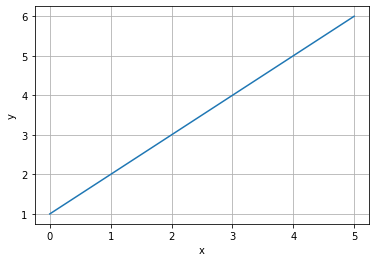

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plotteverdier
x0 = 0                         # startverdi for x
x_slutt = 5.0                  # sluttverdi for x
dx = 1E-5                      # steglengde
N = int((x_slutt - x0)/dx) + 1 # antall punkter

# Initialbetingelser
y0 = 1                  # intitialbetingelse for y

# Differensiallikningen
def yder(y,x):
    return 1 

# Lager arrayer for å spare på verdiene
x = np.zeros(N)
y = np.zeros(N)
y[0] = y0     # Legger inn initalbetingelsen for y
x[0] = x0

# Eulers metode
for i in range(N-1):
    y[i+1] = y[i] + yder(y[i],x[i])*dx
    x[i+1] = x[i] + dx

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

```{admonition} Underveisoppgave
:class: tip
Studer programmet ovenfor og regn ut løkka for hånd med fra $x = 0$ til $x = 5$ med steglengde $dx = 1$.
```

Dersom vi endrer initialbetingelsene, får vi naturlig nok andre løsninger:

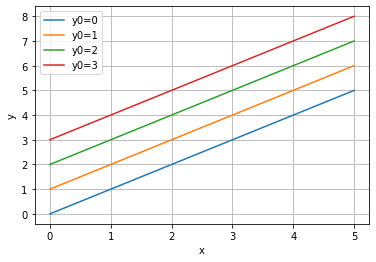

In [12]:
# Plotteverdier
x0 = 0                         # startverdi for x
x_slutt = 5.0                  # sluttverdi for x
dx = 1E-3                      # steglengde
N = int((x_slutt - x0)/dx) + 1 # antall punkter

# Initialbetingelser
y0 = 1                  # intitialbetingelse for y

# Differensiallikningen
def yder(y,x):
    return 1 

# Lager arrayer for å spare på verdiene
x = np.zeros(N)
y = np.zeros(N)
x[0] = x0

y_liste = [0, 1, 2, 3]
for y0 in y_liste:
    y[0] = y0 
    for i in range(N-1):
        y[i+1] = y[i] + yder(y[i],x[i])*dx
        x[i+1] = x[i] + dx
    plt.plot(x,y,label=f"y0={y0}")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Det er enkelt å se at funksjonene vi får ovenfor er $y = x + C$, der $C$ avhenger av initialbetingelsene. Vi får derimot ikke selve funksjonsuttrykket som output, men vi får, som nevnt før, _funksjonsverdiene_. Vi kan også løse likningen $y' = y + x$ på samme måte. Den analytiske løsningen for denne likningen er $y = Ce^x - x - 1$. Resultatene blir da slik for de samme initialbetingelsene som ovenfor:

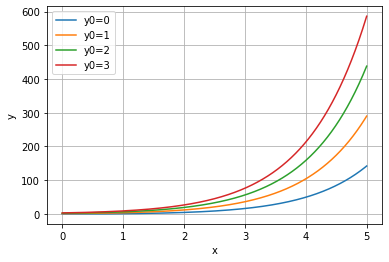

In [13]:
def yder(y,x):
    return y + x

y_liste = [0, 1, 2, 3]
for y0 in y_liste:
    y[0] = y0 
    for i in range(N-1):
        y[i+1] = y[i] + yder(y[i],x[i])*dx
        x[i+1] = x[i] + dx
    plt.plot(x,y,label=f"y0={y0}")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

```{admonition} Underveisoppgave
:class: tip
Løs differensiallikninga $y' + y^3 = \sin(x)$ med Eulers metode fra $x = 0$ til $x = 10$. Bruk initialbetingelsen $y(0) = 0$. Vær nøye med hvordan du definerer funksjonen.
```


## Kontinuerlige modeller

Modeller som er basert på differensiallikninger, er kontinuerlige. Det betyr at de har funksjonsverdier for alle verdier av _x_ (eller tilsvarende variabler). Nå skal det sies at når vi simulerer med utgangspunkt i kontinuerlige matematiske modeller på en datamaskin, blir resultatene ikke helt kontinuerlig. Det er fordi datamaskinen ikke kan operere med uendelig mange eller uendelig små (eller store) verdier. Vi sier at vi _diskretiserer_ problemet når vi benytter en numerisk algoritme for å løse det. Men dersom stegene er tilstrekkelig små, er det en god _tilnærming_ til en kontinuerlig løsning.

Vi har allerede sett på diskrete modeller for blant annet CO$_2$-utslipp. Da tok vi utgangspunkt i følgende diskrete modell:

$$u_{n+1} = u_n + au_n$$

som er det samme som:

$$u_{n+1} - u_n = au_n$$

Vi ser at vi på venstresiden har forskjellen i utslipp fra en tid til en annen. Det kan vi skrive som $\Delta u$, som jo er et uttrykk for (gjennomsnittlig) endring. Da får vi:

$$\Delta u = au_n$$

Dersom vi ønsker den _momentane_ endringen istedenfor den gjennomsnittlige, kan vi uttrykke dette ved den deriverte:

$$u'(t) = au(t)$$

Dermed har vi en kontinuerlig modell som beskriver den momentane endringen i et system! Vi kan da bruke denne modellen til å finne tilstanden til systemet ved ethvert lite tidssteg _dt_. Da kan vi bruke Eulers metode, som ovenfor. Her er et eksempel på hvordan vi kan løse modellen ovenfor:

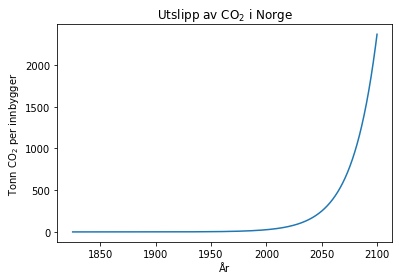

In [6]:
import matplotlib.pyplot as plt 

tid_slutt = 2100  # År etter 1825
tid = 1825        # Startår
a = 0.045         # Utslippsrate
u = 0.01          # Utslipp i 1825 (tonn per innbygger)
dt = 1E-5

utslipp = [u]
årstall = [tid]

while tid <= tid_slutt:
    uder = a*u      # Differensiallikningen
    u = u + uder*dt # Eulers metode
    tid = tid + dt  # Går fram ett tidssteg
    utslipp.append(u)
    årstall.append(tid)

plt.plot(årstall, utslipp)
plt.title("Utslipp av CO$_2$ i Norge")
plt.xlabel("År")
plt.ylabel("Tonn CO$_2$ per innbygger")
plt.show()

Hvis vi sammenlikner med den diskrete modellen for det samme systemet, kan vi se at de to modellene ikke gir det samme resultatet. Dette er fordi utslippsraten _a_ ikke har samme enhet. I det diskrete systemet representerte _a_ vekstraten _per uke_, mens i den kontinuerlige modellen gir _a_ den momentane vekstraten. De to parameterne må derfor bestemmes uavhengig av hverandre.

````{admonition} Underveisoppgave
:class: tip
Følgende modell kan beskrive størrelsen til en populasjon med bæreevnen _b_, vekstrate _a_ og populasjonsstørrelse _N_:

$$N'(t) = aN(t)\left(1-\frac{N(t)}{b}\right)$$

Tida _t_ er gitt i timer.

1. Lag et program som simulerer utviklingen i en bakteriekoloni med N(t$_0$) = 100, _a_ = 0,005 og en bæreevne på 120\ 000 bakterier. 
2. Hvilke forutsetninger og begrensninger ligger til grunn for modellen? 
3. Når vil populasjonen nå bæreevnen?
4. Lag programmet med arrayer istedenfor lister. Husk at _append_ ikke fungerer med arrayer, og at vi må forhåndsdefinere størrelsen til disse arrayene på forhånd. Størrelsen på disse bør være gitt ved (forklar hvorfor!):

```{code-block}
N = int((tid_slutt-tid_start)/dt) + 1 # Antall punkter
```
````

````{admonition} Løsningsforslag (deloppgave 4)
:class: tip, dropdown
```{code-block} Python
import matplotlib.pyplot as plt 
import numpy as np

a = 0.045               # Utslippsrate
u0 = 0.01               # Utslipp i 1825 (tonn per innbygger)

tid_slutt = 2100        # År etter 1825
tid_start = 1825        # Startår
dt = 1E-3               # tidssteg
N = int((tid_slutt-tid_start)/dt) + 1 # Antall punkter

u = np.zeros(N)
t = np.zeros(N)

u[0] = u0
t[0] = tid_start

for i in range(N-1):
    uder = a*u[i]               # Differensiallikningen
    u[i+1] = u[i] + uder*dt     # Eulers metode
    t[i+1] = t[i] + dt          # Går fram ett tidssteg

plt.plot(t, u)
plt.title("Utslipp av CO$_2$ i Norge")
plt.xlabel("År")
plt.ylabel("Tonn CO$_2$ per innbygger")
plt.show()
```
````

## Newtons 2. lov

Vi så at Newtons 2. lov gir oss differensiallikninger når vi omformulerer akselerasjonen som den deriverte av farten.

$$a(t) = v'(t) = s''(t)$$

Vi kan altså få både en førsteordens og en andreordens difflikning ut av Newtons 2. lov. Det betyr også at vi kan finne akselerasjon og fart ut fra strekning ved å derivere, og motsatt finne fart og posisjon fra akselerasjon ved å integrere. Vi kan med andre ord skrive Newtons 2. lov slik:

$$F = ma(t) = mv'(t) = ms''(t)$$

La oss ta et eksempel. Når vi slipper ei kule fra en viss høyde, kan vi regne med at to krefter virker på kula: tyngdekraften og luftmotstand. For en lett ball som faller, kan vi si at summen av krefter er summen av gravitasjonskraften og luftmotstanden i $y$-retning på en graf. Vi definerer positiv retning oppover $y$-aksen.

$$\sum F = G - L = ma(t) = mv'(t) = ms''(t)$$

Vi ser at vi nå har den deriverte av hastigheten, som er akselerasjonen. For å kunne løse denne likningen, må vi finne ut hva summen av kreftene er. Du husker kanskje at $G = mg$, og at en mulig modell for luftmotstand er $L = -kv$, der $k$ er en konstant som blant annet er avhengig av legemets form. Da kan vi skrive uttrykket slik:

$$ma(t) = - mg + (- kv(t))$$

$$a(t) = \frac{- mg - kv(t)}{m} = - g - \frac{kv(t)}{m}$$

Dette er en førsteordens difflikning der vi har en funksjon $v(t)$, og dens deriverte $a(t)$ (det vil si $v'(t)$). La oss løse denne numerisk.

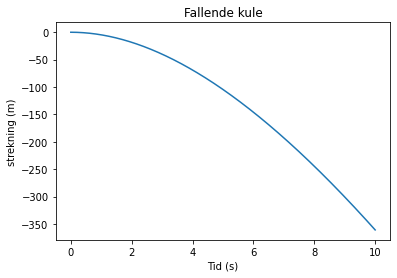

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Konstanter
k = 0.1   # Luftmotstand
g = 9.81  # Tyngdeakselerasjon i m/s^2
m = 1     # Masse i kg
v0 = 0    # Starthastighet i m/s
s0 = 0    # Startposisjon i m

# Tidsvariabler
dt = 1E-5 # Tidsintervall i s
tid_start = 0
tid_slutt = 10
N = int((tid_slutt-tid_start)/dt) + 1 # Antall punkter

# Arrayer
t = np.zeros(N)
a = np.zeros(N)
v = np.zeros(N)
s = np.zeros(N)

# Startverdier
t[0] = tid_start
v[0] = v0
s[0] = s0

for i in range(N-1):
    a[i] = - g - k*v[i]/m
    v[i+1] = v[i] + a[i]*dt
    s[i+1] = s[i] + v[i]*dt + 0.5*a[i]*dt**2
    t[i+1] = t[i] + dt

plt.plot(t,s)
plt.title('Fallende kule')
plt.xlabel('Tid (s)')
plt.ylabel('strekning (m)')
plt.show()

```{admonition} Underveisoppgave
:class: tip
Studer programmet ovenfor og forklar hvordan det fungerer linje for linje. Test programmet med andre modeller for luftmotstand. Hva bestemmer hva slags modell du bør bruke, tror du?
```

## ODE-løsere
La oss se nå se på hvordan vi kan løse differensiallikninger med funksjoner fra scipy-biblioteket. De differensiallikningene vi har sett på, kaller vi for _ODE-er_ (ordinary differential equations) for å skille dem fra _PDE-er_ (partial differential equations). Vi skal ikke se på partielle differensiallikninger her, men mange av prinsippene for å løse dem er like som for ODE-er. Vi kommer til å bruke ODE som forkortelse videre.

Vi starter med enkle differensiallikninger for å illustrere de grunnleggende prinsippene. En enkel differensiallikning vi kan begynne med, er:

$$y' = t - y$$

Vi kan skrive høyresida her som $f(t,y)$, siden den kan beskrives som en funksjon av _t_ og _y_. Deretter kan vi implementere en løser ved hjelp av en funksjon som heter _solve\_ivp_ ("solve initial value problem").

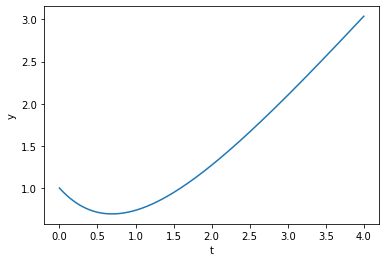

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dy_dt(t, y):
    return t - y

a = 0
b = 4
t = np.linspace(a,b,1000)
y0 = 1
y_int = solve_ivp(dy_dt, [a,b], [1], t_eval=t)

plt.xlabel("t")
plt.ylabel("y")
plt.plot(y_int.t, y_int.y[0])

plt.show()

Vi definerer her et sett med t-verdier slik at vi får et intervall å integrere over. Dernest er det viktig å ha en startbetingelse for $y$ (husk: vi trenger den forrige $y$-verdien for å finne den neste). Funksjonen _solve\_ivp_ er en generell løser for differensiallikninger og tar som første parameter en funksjon av typen $f(t,y)$ – legg merke til rekkefølgen på parameterne. Deretter legger vi inn tidsintervallet som vi skal integrere over. Dette legges inn som en liste.

Etter tidsintervallet legges startbetingelsene inn. Siden _solve\_ivp_ er en løser som kan løse systemer av differensiallikninger, må vi lage startbetingelsen som en liste. Deretter har vi en del valgfrie parametre. Vi har brukt parameteren _t\_eval_ her fordi den sier hvilke $t$-verdier vi skal regne ut $y$-verdier for. Hvis vi ikke gjør dette, får vi integralet kun evaluert i noen få punkter. Det kan være greit hvis vi for eksempel bare ønsker sluttverdien, men ikke hvis vi ønsker å plotte resultatene.

Dersom du prøver å printe ut resultatene fra _solve\_ivp_, får du mye ulik informasjon. Derfor henter vi ut spesifikke _t-_ og _y-_verdier ved  å skrive _y_int2.t_, som henter ut tidsverdiene, og _y_int2.y[0]_, som henter ut _y_-verdiene. Legg merke til at $y$ kan inneholde flere elementer ettersom vi kan løse systemer av differensiallikninger. Her må vi eksplisitt be om det første elementet (element 0 med Python-språk), selv om arrayen ikke inneholder flere $y$-verdier.

```{admonition} Underveisoppgave
:class: tip
Løs differensiallikningen $f'(t) = \cos(t)$ med $f(t_0) = 0$ med _solve\_ivp_ fra $t=0$ til $t=\pi$. Plott den analytiske løsningen $f(t) = \sin(t)$ i samme koordinatsystem for å sammenlikne.
```

Algoritmene som brukes i slike biblioteker, er ofte sammensatte algoritmer som benytter seg av flere prinsipper enn en enkelt metode. Som standard benytter _solve\_ivp_ seg av en blanding av Runge-Kutta 4 og Runge-Kutta 5, kalt RK45. Dette er gode "go to"-metoder.

## Videoer

````{tabbed} Differensiallikninger
<iframe width="850" height="450" src="https://www.youtube.com/embed/O08ToTAqp5w" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
````